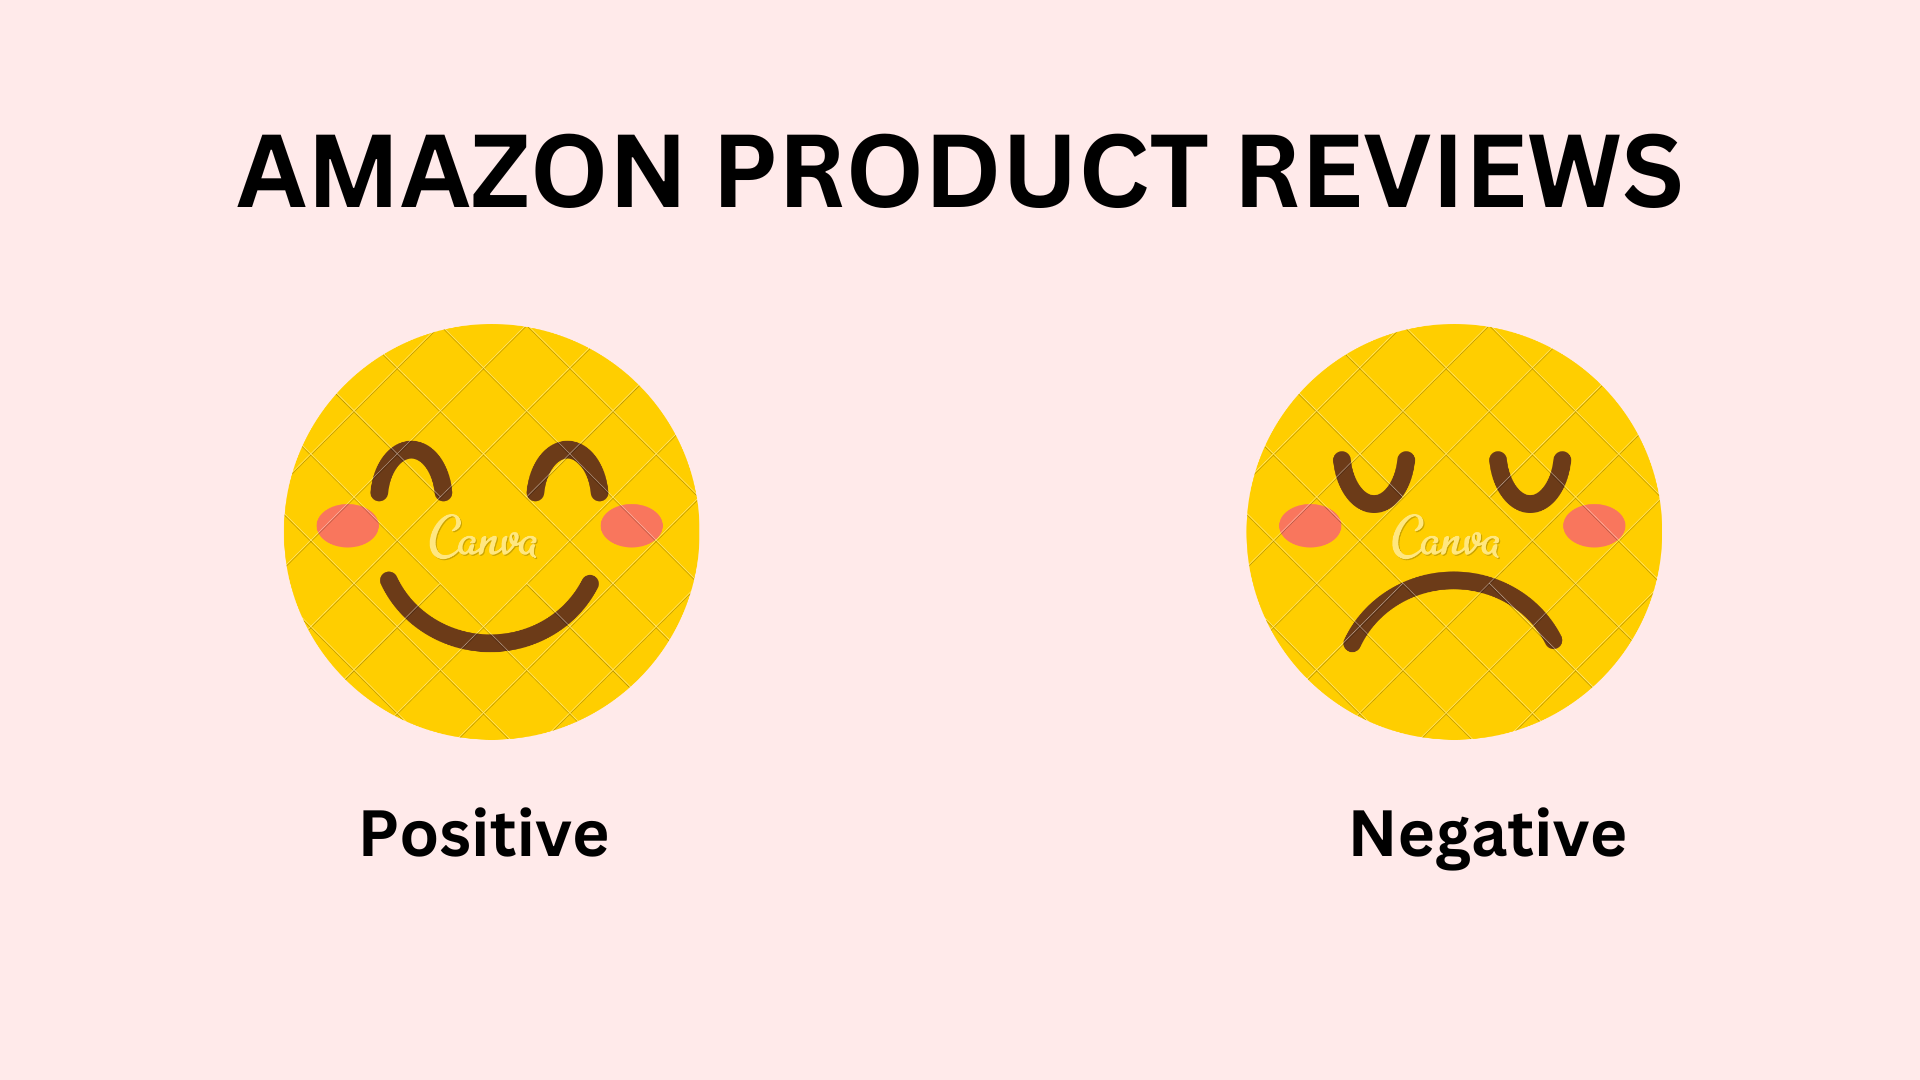

# **AMAZON PRODUCT REVIEWS: SENTIMENT ANALYSIS**

This notebook contains code that analyzes the Amazon product review dataset. I will be performing EDA, Data Preprocessing before building a sentiment analysis model.

## **Importing the Necessary Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

## **Exploratory Data Analysis**

In [3]:
df = pd.read_csv("/content/Amazon-Product-Reviews - Amazon Product Review (1).csv")

In [4]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [5]:
#getting the shape
df.shape

(30846, 16)

In [6]:
df.info()  #getting the info summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30846 non-null  object
 13  review_body        30846 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

From the above we can see that our review_date isn't in the right data type so we will change that.

In [7]:
#changing the data type of our review date to the right dtype
df["review_date"] = pd.to_datetime(df.review_date)
df.review_date.dtype

dtype('<M8[ns]')

Now that has been changed let's move forward with our analysis.

In [8]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [9]:
#checking the number of unique values we have in our dataset
for column in df.columns:
  print(column, ":", df[column].nunique())

marketplace : 1
customer_id : 30845
review_id : 30846
product_id : 21
product_parent : 1
product_title : 1
product_category : 1
star_rating : 5
helpful_votes : 71
total_votes : 80
vine : 1
verified_purchase : 2
review_headline : 15716
review_body : 27762
review_date : 333
sentiment : 2


From the above we can conclude that we are dealing with only one country, one product(parent,title and category) and also one vine. This information will help in the data visualization section.

In [10]:
df.describe() #to get a statistic summary of our dataset

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,4.336154,0.68641,0.895027,0.835343
std,1.611172e+07,0.0,1.120716,30.74337,32.356354,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.000000
25%,1.150637e+07,2693241.0,4.000000,0.00000,0.000000,1.000000
50%,2.294025e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,1.000000


Before we move on to finding trends and patterns in our dataset, I will create some new columns for easy data visualization.

In [11]:
#from our review_date column I will extract new columns that show the year and month each review was made
df["month"] = df["review_date"].dt.month
df["year"] = df["review_date"].dt.year

In [12]:
#checking to see how many years we have in our dataset
df["year"].value_counts()

2015    25025
2014     5821
Name: year, dtype: int64

##**Data Visualizations**

Now that we have our columns sorted out, we will move on to the data visualization aspect. For this section, we will be finding trends and patterns in the dataset. The flow of this section will look like this:

`Univariate Visualization --- Bivariate Visualization`

[Learn more about Univariate and Bivariate Analysis]("https://www.geeksforgeeks.org/what-is-univariate-bivariate-multivariate-analysis-in-data-visualisation/")


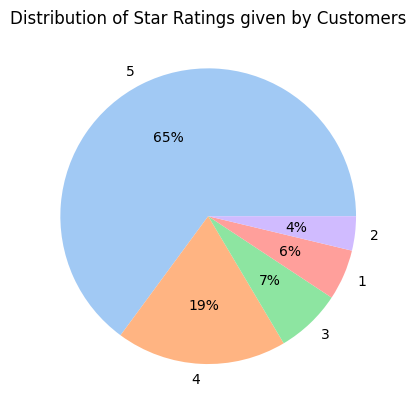

In [13]:
#visualizing the disribution of star ratings given by customers
rating = dict(df["star_rating"].value_counts())
palette = sns.color_palette("pastel")
plt.pie(rating.values(), labels = rating.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Star Ratings given by Customers")
plt.show()

<ipython-input-14-c7df6c334262>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "product_id", palette = "flare")


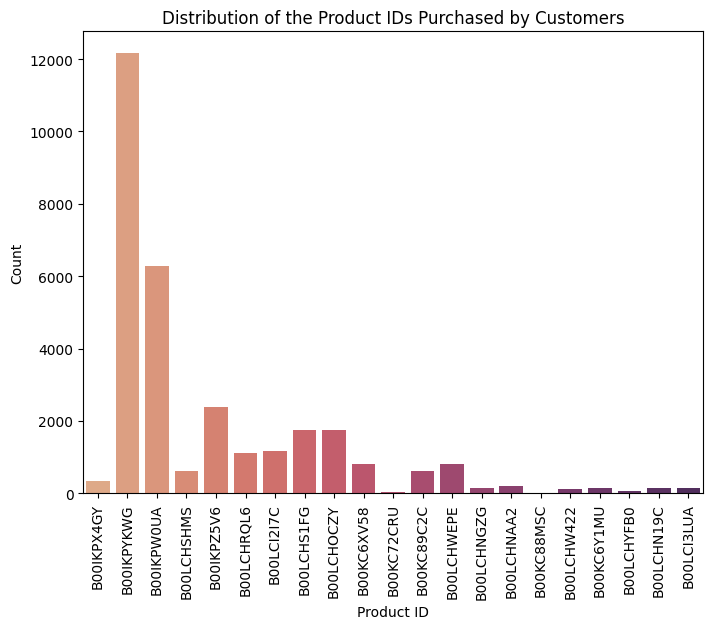

In [14]:
#visualizing the distribution of the products by their IDs bought by the customers
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "product_id", palette = "flare")
plt.title("Distribution of the Product IDs Purchased by Customers")
plt.xticks(rotation = 90)
plt.xlabel("Product ID")
plt.ylabel("Count");

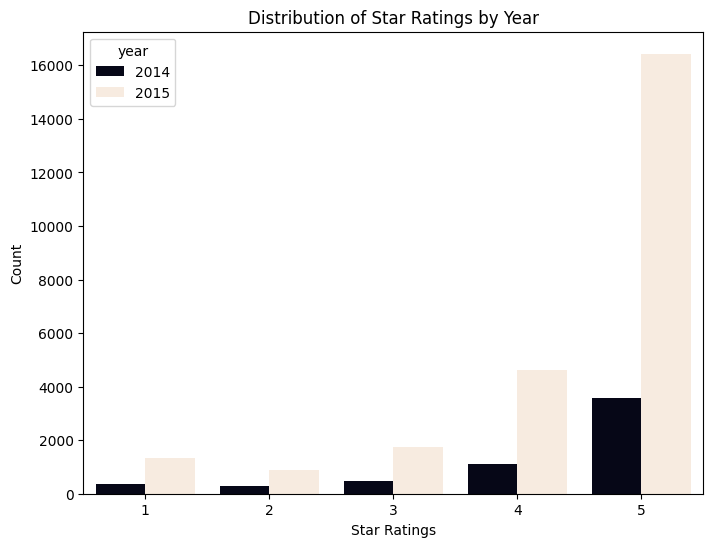

In [16]:
#moving on to bivariate analysis. we will see the relation between the star ratings and the year
plt.figure(figsize = (8,6))
sns.countplot(df, x = "star_rating", hue  = "year", palette = "rocket")
plt.xlabel("Star Ratings")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings by Year");